<a href="https://colab.research.google.com/github/fannyfdlsa/Cataract_model_detection/blob/main/VGG19_(epoch_15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf

In [ ]:
class_names = ('normal', 'mature', 'immature', 'hypermature')
target_size = (224, 224)

train_dir = '/content/drive/MyDrive/cataract_data/split_data/train'
valid_dir = '/content/drive/MyDrive/cataract_data/split_data/valid'
test_dir = '/content/drive/MyDrive/cataract_data/split_data/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=64,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=target_size,
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 2792 images belonging to 4 classes.
Found 598 images belonging to 4 classes.
Found 601 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Additional custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,449,220 (100.90 MB)

 Trainable params: 6,424,324 (24.51 MB)

 Non-trainable params: 20,024,896 (76.39 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

class TargetAccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy=0.99):
        super(TargetAccuracyCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs and logs.get('val_accuracy') >= self.target_accuracy:
            print(f"\nReached target validation accuracy of {self.target_accuracy}. Stopping training.")
            self.model.stop_training = True

checkpoint_filepath = '/content/drive/MyDrive/cataract_data/best_model_3b.keras'

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1,
)

target_accuracy_callback = TargetAccuracyCallback(target_accuracy=0.99)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, target_accuracy_callback]
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 53s/step - accuracy: 0.5495 - loss: 1.4175 
Epoch 1: val_accuracy improved from -inf to 0.43645, saving model to /content/drive/MyDrive/cataract_data/best_model_3b.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 2973s 65s/step - accuracy: 0.5515 - loss: 1.4082 - val_accuracy: 0.4365 - val_loss: 3.8460
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 52s/step - accuracy: 0.8250 - loss: 0.4549 
Epoch 2: val_accuracy improved from 0.43645 to 0.54849, saving model to /content/drive/MyDrive/cataract_data/best_model_3b.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 2829s 63s/step - accuracy: 0.8252 - loss: 0.4542 - val_accuracy: 0.5485 - val_loss: 1.6221
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 51s/step - accuracy: 0.9070 - loss: 0.2691 
Epoch 3: val_accuracy improved from 0.54849 to 0.73077, saving model to /content/drive/MyDrive/cataract_data/best_model_3b.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 2755s 63s/step - accuracy: 0.9071 - loss: 0.2685 - val_accuracy: 0.7308 - val_loss: 0.7125
Epoch 4/15
44/44 ━

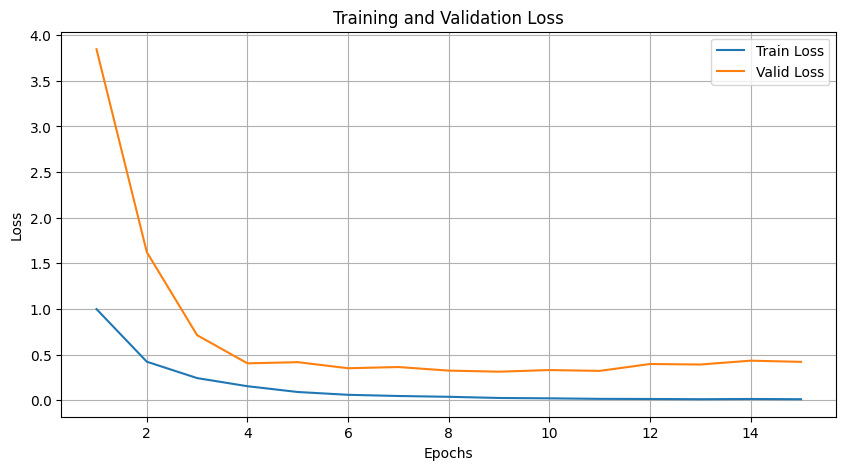

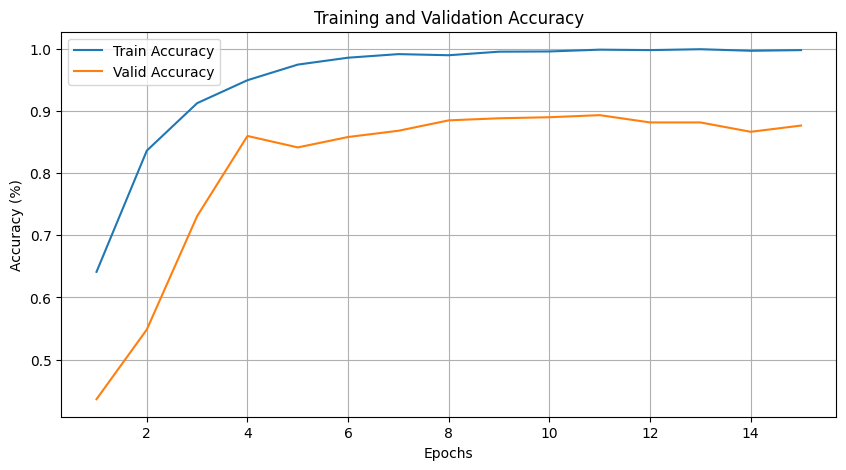

Training completed.


In [ ]:
# Extract training and validation metrics from the history object
train_losses = history.history['loss']
valid_losses = history.history['val_loss']
train_accuracies = history.history['accuracy']
valid_accuracies = history.history['val_accuracy']

num_epochs = len(train_losses)

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print("Training completed.")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 495s 49s/step


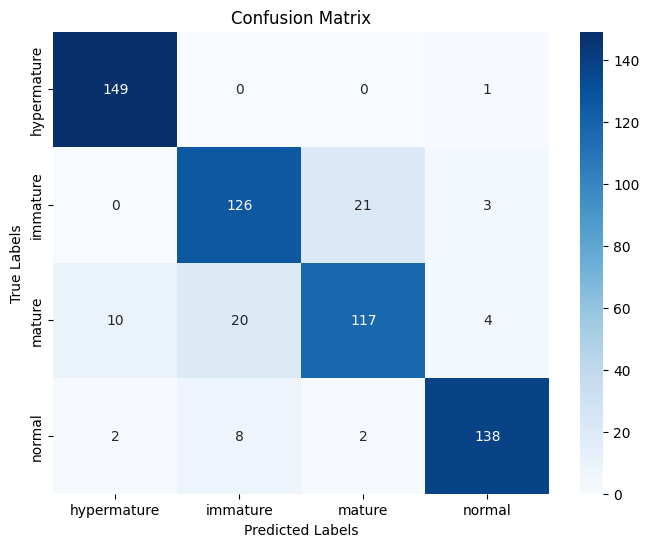

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model('/content/drive/MyDrive/cataract_data/best_model_3b.keras')

# Evaluate the model on the test set
evaluation = best_model.evaluate(test_generator)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Print confusion matrix
print(confusion_matrix(y_true, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 507s 51s/step - accuracy: 0.9160 - loss: 0.2508
Test Loss: 0.3397817015647888
Test Accuracy: 0.881863534450531
              precision    recall  f1-score   support

 hypermature       0.93      0.99      0.96       150
    immature       0.82      0.84      0.83       150
      mature       0.84      0.77      0.80       151
      normal       0.95      0.92      0.93       150

    accuracy                           0.88       601
   macro avg       0.88      0.88      0.88       601
weighted avg       0.88      0.88      0.88       601

[[149   0   0   1]
 [  0 126  21   3]
 [ 10  20 117   4]
 [  2   8   2 138]]
